In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import jax.numpy as jnp
import jax

In [2]:
import lib

In [20]:
ns=300
nd=200
rho=200
bias = 3.0 
ndR = 10
kappa = 2.32635
n_votes = nd
vote_th = bias
la = 1.35515
# beta = 13.6868·

# ns=300
# nd=200
# bias = 2.32635
# # ndR = 10
# n_votes = 3
# kappa = 3.
# la = 0.445556
# # # beta = 11.5

decay_steps = 30000
n_tested_patterns = 500
initial_steps = 5000

seed = 238
rng = np.random.default_rng(seed)

# neuron = lib.Neuron10_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, seed=rng.integers(100000))
# neuron = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))

# xs_gen = lib.Xs_Generator1(normalized_len=-1, seed=rng.integers(100000))
xs_gen = lib.Xs_Generator3_2(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

simulation_run = lib.Simulation_Run2(neuron, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [21]:
simulation_run.run()

100%|██████████| 30500/30500 [01:11<00:00, 424.80it/s]


In [22]:
upper99_1 = jnp.mean(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_1_init = jnp.mean(simulation_run.votes_record, axis=0)[0]
print(upper99_1)
print(mean_1_init)

1.1001894
22.643732


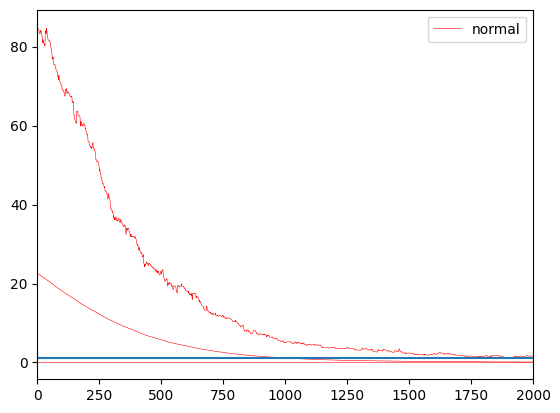

In [23]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="normal")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.hlines(upper99_1, 0, decay_steps)
plt.xlim(0, 2000)
plt.legend()

In [18]:
ns=300
nd=200
rho = 1
bias = 3.0
ndR = 5
kappa = 1.5
n_votes = nd
vote_th = bias
# la = 0.445556
# beta = 11.5

decay_steps = 30000
n_tested_patterns = 500
initial_steps = 5000

seed = 12345
rng = np.random.default_rng(seed)

# neuron = lib.Neuron10_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, seed=rng.integers(100000))
neuron2 = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, seed=rng.integers(100000))

# xs_gen = lib.Xs_Generator1(normalized_len=-1, seed=rng.integers(100000))
# xs_gen = lib.Xs_Generator3_1(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))
xs_gen = lib.Xs_Generator3_2(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

simulation_run2 = lib.Simulation_Run(neuron2, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [19]:
simulation_run2.run()

100%|██████████| 30500/30500 [01:13<00:00, 415.32it/s]


In [20]:
upper99_2 = jnp.mean(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_2_init = jnp.mean(simulation_run2.votes_record, axis=0)[0]
print(upper99_2)
print(mean_2_init)

0.9795075
6.9602437


In [22]:
# mean_time_list0 = np.genfromtxt("tmp_data/meanTimeList0.csv", delimiter=',')
# lower99_time_list0 = np.genfromtxt("tmp_data/lower99TimeList0.csv", delimiter=',')
# upper99_time_list0 = np.genfromtxt("tmp_data/upper99TimeList0.csv", delimiter=',')

# mean_time_list1 = np.genfromtxt("tmp_data/meanTimeList1.csv", delimiter=',')
# lower99_time_list1 = np.genfromtxt("tmp_data/lower99TimeList1.csv", delimiter=',')
# upper99_time_list1 = np.genfromtxt("tmp_data/upper99TimeList1.csv", delimiter=',')

mean_time_list = np.genfromtxt("tmp_data/meanTimeList.csv", delimiter=',')
lower99_time_list = np.genfromtxt("tmp_data/lower99TimeList.csv", delimiter=',')
upper99_time_list = np.genfromtxt("tmp_data/upper99TimeList.csv", delimiter=',')

Text(0, 0.5, 'memory response Y')

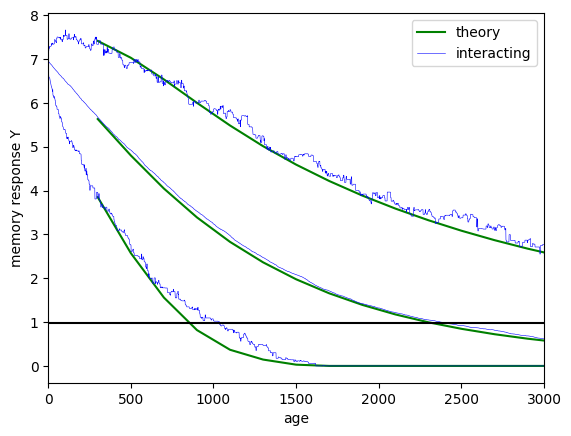

In [24]:
plt.plot(mean_time_list[:, 0], mean_time_list[:, 1], c="green", linewidth=1.5, label="theory")
plt.plot(lower99_time_list[:, 0], lower99_time_list[:, 1], c="green", linewidth=1.5)
plt.plot(upper99_time_list[:, 0], upper99_time_list[:, 1], c="green", linewidth=1.5)

# plt.plot(mean_time_list1[:, 0], mean_time_list1[:, 1], c="orange", linewidth=1.5, label="theory old")
# plt.plot(lower99_time_list1[:, 0], lower99_time_list1[:, 1], c="orange", linewidth=1.5)
# plt.plot(upper99_time_list1[:, 0], upper99_time_list1[:, 1], c="orange", linewidth=1.5)

# plt.plot(mean_time_list0[:, 0], mean_time_list0[:, 1], c="brown", linewidth=1.5, label="theory accurate")
# plt.plot(lower99_time_list0[:, 0], lower99_time_list0[:, 1], c="brown", linewidth=1.5)
# plt.plot(upper99_time_list0[:, 0], upper99_time_list0[:, 1], c="brown", linewidth=1.5)

# plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4, label="non-interacting")
# plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4)
# plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4)

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="blue", linewidth=0.4, label="interacting")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="blue", linewidth=0.4)
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="blue", linewidth=0.4)

# plt.hlines(upper99_1, 0, decay_steps, colors="red")
plt.hlines(upper99_2, 0, decay_steps, colors="black")
plt.xlim(000, 3000)
plt.legend()
plt.xlabel("age")
plt.ylabel("memory response Y")

Text(0, 0.5, 'memory response Y')

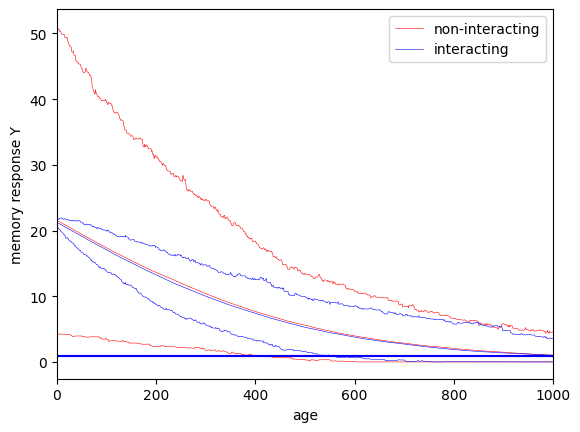

In [19]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="non-interacting")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="blue", linewidth=0.4, label="interacting")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="blue", linewidth=0.4)
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="blue", linewidth=0.4)

plt.hlines(upper99_1, 0, decay_steps, colors="red")
plt.hlines(upper99_2, 0, decay_steps, colors="blue")
plt.xlim(000, 1000)
plt.legend()
plt.xlabel("age")
plt.ylabel("memory response Y")

In [17]:
# tmp = (np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps] - upper99_1)
# tmp = np.bitwise_and(tmp[:-1]>0, tmp[1:]<0)
# print("single-dendrite: ", np.mean(np.argwhere(tmp)))

tmp = (np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps] - upper99_2)
tmp = np.bitwise_and(tmp[:-1]>0, tmp[1:]<0)
print("multi-dendrite: ", np.mean(np.argwhere(tmp)))

multi-dendrite:  1460.5
